In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [256]:
file_data = pd.read_csv("~/Downloads/special_indicator_stream1.csv")

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import binom

# Load the data from the CSV file (located in the Downloads folder)
df = pd.read_csv(r"~/Downloads/data3.csv")  # replace with the actual path

print(df.size)

# Remove the first 2000 rows to discard invalid data
df = df.iloc[2000:]

# Rename columns for clarity (use the correct column indices)
df.columns = ['column_{}'.format(i) for i in range(df.shape[1])]  # Assign temporary column names
df.rename(columns={df.columns[1]: 'close', df.columns[8]: 'indicator'}, inplace=True)

# Calculate the percentage change for 'close'
df['close_pct_change'] = df['close'].pct_change() * 100  # Convert to percentage change

# Shift the 'close_pct_change' column by 1 to align with the indicator (i.e., predict the next change)
df['close_pct_change_shifted'] = df['close_pct_change']#.shift(-1)

# Drop the last row as it will have NaN in 'close_pct_change_shifted'
df.dropna(subset=['close_pct_change_shifted'], inplace=True)

# Create a binary column to represent if the next change is positive or negative
df['close_change_up'] = df['close_pct_change_shifted'] > 0  # True if next change is positive

# Define the thresholds for indicator value (100 and 0)
indicator_100 = df[df['indicator'] == 100]
indicator_0 = df[df['indicator'] == 0]

# Test the hypothesis for indicator = 100
# Null hypothesis: The probability of a positive change is 50% (no predictive power)
p_indicator_100 = indicator_100['close_change_up'].mean()  # Proportion of positive changes
n_100 = len(indicator_100)  # Sample size for indicator = 100

# Perform a binomial test for indicator = 100
p_value_100 = 1 - binom.cdf(sum(indicator_100['close_change_up']), n_100, 0.5)

# Test the hypothesis for indicator = 0
# Null hypothesis: The probability of a negative change is 50% (no predictive power)
p_indicator_0 = (indicator_0['close_change_up'] == False).mean()  # Proportion of negative changes
n_0 = len(indicator_0)  # Sample size for indicator = 0

# Perform a binomial test for indicator = 0
p_value_0 = 1 - binom.cdf(sum(indicator_0['close_change_up'] == False), n_0, 0.5)

# Output the results
print(f"Proportion of positive change when indicator = 100: {p_indicator_100:.4f}")
print(f"P-value for indicator = 100: {p_value_100:.4f}")

print(f"Proportion of negative change when indicator = 0: {p_indicator_0:.4f}")
print(f"P-value for indicator = 0: {p_value_0:.4f}")

# Decision making based on p-values
alpha = 0.05  # Significance level

if p_value_100 < alpha:
    print("Reject null hypothesis for indicator = 100: The indicator value of 100 significantly predicts a positive next change in close.")
else:
    print("Fail to reject null hypothesis for indicator = 100: No significant prediction for positive change.")

if p_value_0 < alpha:
    print("Reject null hypothesis for indicator = 0: The indicator value of 0 significantly predicts a negative next change in close.")
else:
    print("Fail to reject null hypothesis for indicator = 0: No significant prediction for negative change.")
df.head()

187085
Proportion of positive change when indicator = 100: 0.5579
P-value for indicator = 100: 0.0000
Proportion of negative change when indicator = 0: 0.7476
P-value for indicator = 0: 0.0000
Reject null hypothesis for indicator = 100: The indicator value of 100 significantly predicts a positive next change in close.
Reject null hypothesis for indicator = 0: The indicator value of 0 significantly predicts a negative next change in close.


,column_0,close,column_2,column_3,column_4,column_5,column_6,column_7,indicator,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,close_pct_change,close_pct_change_shifted,close_change_up
2001,1732744518001,96164.51334,11,38,45,54,70,100,100,87,74,0,0,39,0,0,0,0.000216,0.000216,True
2002,1732744519001,96164.23781,45,0,35,54,67,100,100,100,73,0,21,39,0,0,0,-0.000287,-0.000287,False
2003,1732744520000,96164.03717,0,30,23,46,56,100,100,100,73,0,13,38,0,0,0,-0.000209,-0.000209,False
2004,1732744521001,96164.03355,28,25,32,46,52,100,100,100,73,0,9,38,0,0,0,-0.000004,-0.000004,False
2005,1732744522000,96164.03355,49,12,25,42,52,90,100,100,73,0,15,38,0,0,0,0.000000,0.000000,False


In [257]:
#raw data preprocessing step
file_data = file_data.select_dtypes(include=['float64', 'int64'])
file_data = file_data.fillna(0)
file_data = file_data.astype('float64')
# Remove rows with NaN or infinite values
file_data = file_data[np.isfinite(file_data.iloc[:, 4])]

In [258]:
file_data = file_data.iloc[1786:]

# Replace NaN and infinite values with 0
file_data = file_data.replace([np.inf, -np.inf, np.nan], 0)

In [386]:
file_data.head()

,95707.30444,50,50.1,50.2,50.3,50.4,50.5,50.6,50.7,50.8,50.9,50.10,50.11,50.12,50.13,50.14
1786,95854.9,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,10.0,0.0
1787,95854.7,19.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,11.0,0.0
1788,95854.6,49.0,19.0,0.0,0.0,23.0,5.0,0.0,0.0,6.0,0.0,0.0,7.0,2.0,11.0,0.0
1789,95854.6,33.0,49.0,19.0,0.0,15.0,24.0,0.0,0.0,22.0,0.0,0.0,8.0,4.0,10.0,0.0
1790,95836.6,0.0,2.0,21.0,0.0,0.0,25.0,0.0,0.0,11.0,0.0,0.0,1.0,0.0,8.0,0.0


In [387]:
# Select two columns by index and work on a copy
data = file_data.iloc[:, [0, 7]].copy()  # Ensure a deep copy
data.columns = ['close', 'indicator']    # Rename columns

# Calculate the 12-period EMA
data.loc[:, 'EMA12'] = data['close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-period EMA
data.loc[:, 'EMA26'] = data['close'].ewm(span=26, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
data.loc[:, 'MACD'] = data['EMA12'] - data['EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
data.loc[:, 'Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [388]:
data.head()

,close,indicator,EMA12,EMA26,MACD,Signal_Line
1786,95854.9,0.0,95854.900000,95854.900000,0.000000,0.000000
1787,95854.7,0.0,95854.869231,95854.885185,-0.015954,-0.003191
1788,95854.6,0.0,95854.827811,95854.864060,-0.036250,-0.009803
1789,95854.6,0.0,95854.792763,95854.844500,-0.051737,-0.018190
1790,95836.6,0.0,95851.993876,95853.493056,-1.499180,-0.314388


In [389]:
# calculate percent changes to make stationary
data['close'] = data['close'].pct_change()
data['EMA12'] = data['EMA12'].pct_change()
data['EMA26'] = data['EMA26'].pct_change()
#scale to log to minimize outliers
#data['close'] = np.log1p(data['close'])

In [390]:
data.head()

,close,indicator,EMA12,EMA26,MACD,Signal_Line
1786,NaN,0.0,NaN,NaN,0.000000,0.000000
1787,-0.000002,0.0,-3.209980e-07,-1.545546e-07,-0.015954,-0.003191
1788,-0.000001,0.0,-4.321128e-07,-2.203834e-07,-0.036250,-0.009803
1789,0.000000,0.0,-3.656341e-07,-2.040588e-07,-0.051737,-0.018190
1790,-0.000188,0.0,-2.919923e-05,-1.409886e-05,-1.499180,-0.314388


In [391]:
X = data.shift(1)
y = data['close']#.clip(-0.00026,0.00026)
X['close'] = X['close']#.clip(-0.00026,0.00026)
# Drop rows where either X or y has NaN
X = X.iloc[1:]  # Remove the first row of X (shifted data creates NaN there)
y = y.iloc[1:]  # Align y by removing the same first row
X = X.fillna(0)

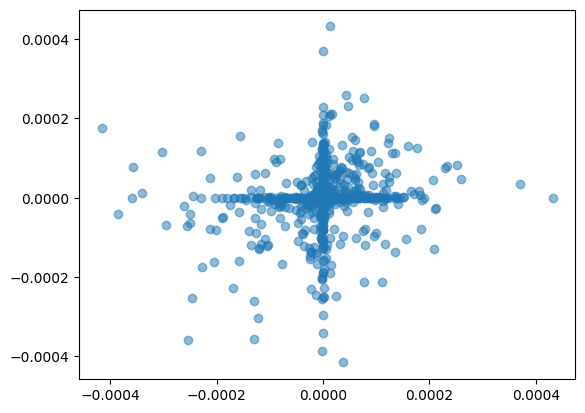

In [392]:
plt.scatter(X['close'], y, alpha = 0.5)

In [393]:
from sklearn.model_selection import train_test_split

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [395]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge

In [408]:
model = Pipeline([
    #("poly", PolynomialFeatures(degree=2, include_bias=False)),
	("scale", RobustScaler()),
	("model", LinearRegression())
])

In [409]:
X_train.head()

,close,indicator,EMA12,EMA26,MACD,Signal_Line
1787,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000
1788,-0.000002,0.0,-3.209980e-07,-1.545546e-07,-0.015954,-0.003191
1789,-0.000001,0.0,-4.321128e-07,-2.203834e-07,-0.036250,-0.009803
1790,0.000000,0.0,-3.656341e-07,-2.040588e-07,-0.051737,-0.018190
1791,-0.000188,0.0,-2.919923e-05,-1.409886e-05,-1.499180,-0.314388


In [410]:
# train the model
model.fit(X_train, y_train)

Pipeline(steps=[('scale', RobustScaler()), ('model', LinearRegression())])

In [411]:
# create prediction
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted Closing price change')

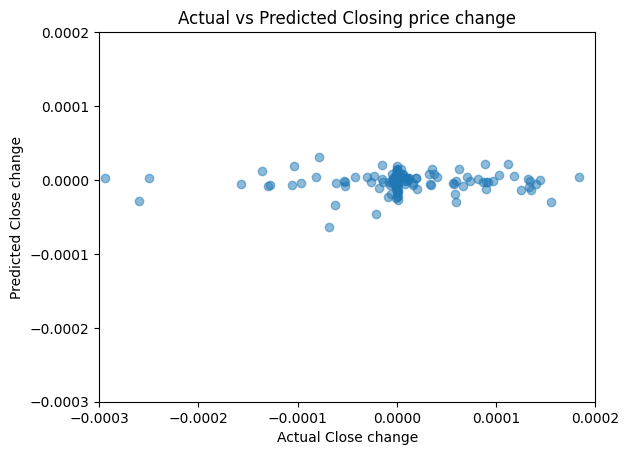

In [412]:
plt.scatter(y_test, y_pred, alpha=0.5)
# Set the same range for both axes
plt.xlim(-0.0003, 0.0002)
plt.ylim(-0.0003, 0.0002)
plt.xlabel("Actual Close change")
plt.ylabel("Predicted Close change")
plt.title("Actual vs Predicted Closing price change")

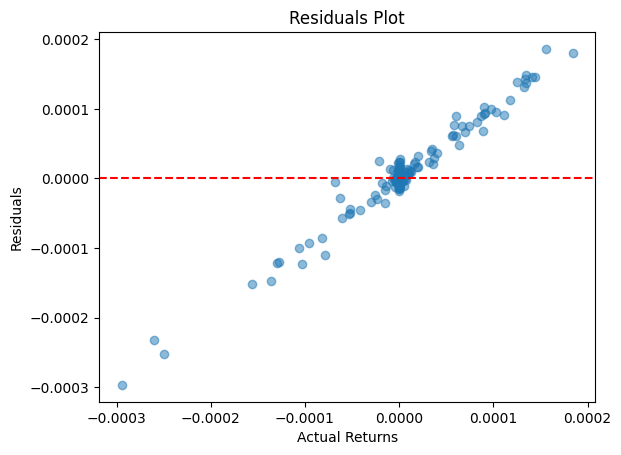

In [413]:
# Calculate residuals
residuals = y_test - y_pred

# Scatter plot of residuals
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Returns")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

In [414]:
from sklearn.metrics import mean_squared_error, r2_score
print("Train MSE:", mean_squared_error(y_train, model.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, model.predict(X_test)))
print("Train R^2:", r2_score(y_train, model.predict(X_train)))
print("Test R^2:", r2_score(y_test, model.predict(X_test)))

Train MSE: 6.829291191236708e-09
Test MSE: 4.665305012188915e-09
Train R^2: 0.03467000084223948
Test R^2: -0.02983000513615819
